# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
final_data=pd.merge(study_results,mouse_metadata, how="left", on= ["Mouse ID", "Mouse ID"])
final_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [131]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [132]:
# Checking the number of mice.
final_data["Mouse ID"].nunique()


249

In [133]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
final_data.groupby(["Mouse ID","Timepoint"]).size().sort_values()


Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [134]:
# Optional: Get all the data for the duplicate mouse ID. 
fixed=final_data["Mouse ID"]=="g989"
final_data.loc[fixed]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data=final_data.drop_duplicates("Mouse ID")
#I tried to use that function and showed as it worked but the number of mice would still the same

In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
fixed=final_data["Mouse ID"]!="g989"
clean_data=final_data.loc[fixed].reset_index(drop=True)

In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [138]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
data_alt=clean_data.groupby("Drug Regimen")
summary_stats = data_alt['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

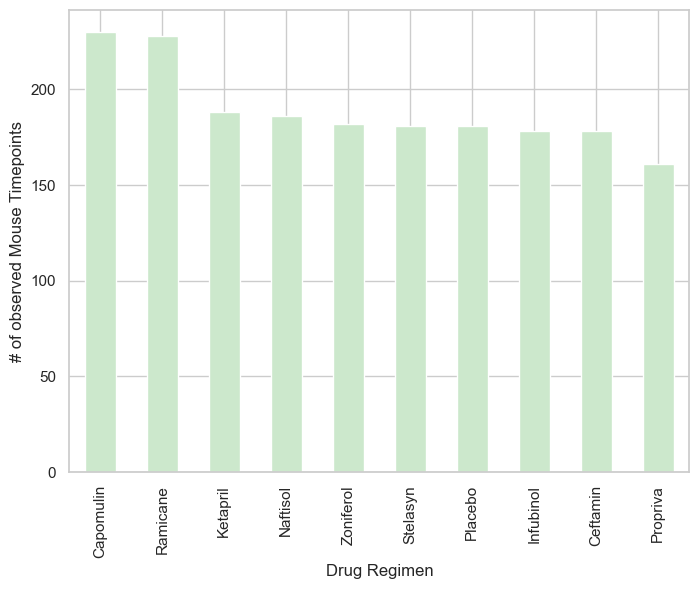

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_data=final_data['Drug Regimen'].value_counts()
plot_data.plot(kind='bar', color='#cce8cc', figsize=(8, 6))
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

In [141]:
final_data["Mouse ID"].sort_values()

113     a203
389     a203
1295    a203
1675    a203
1577    a203
        ... 
1143    z969
1076    z969
301     z969
1529    z969
909     z969
Name: Mouse ID, Length: 1893, dtype: object

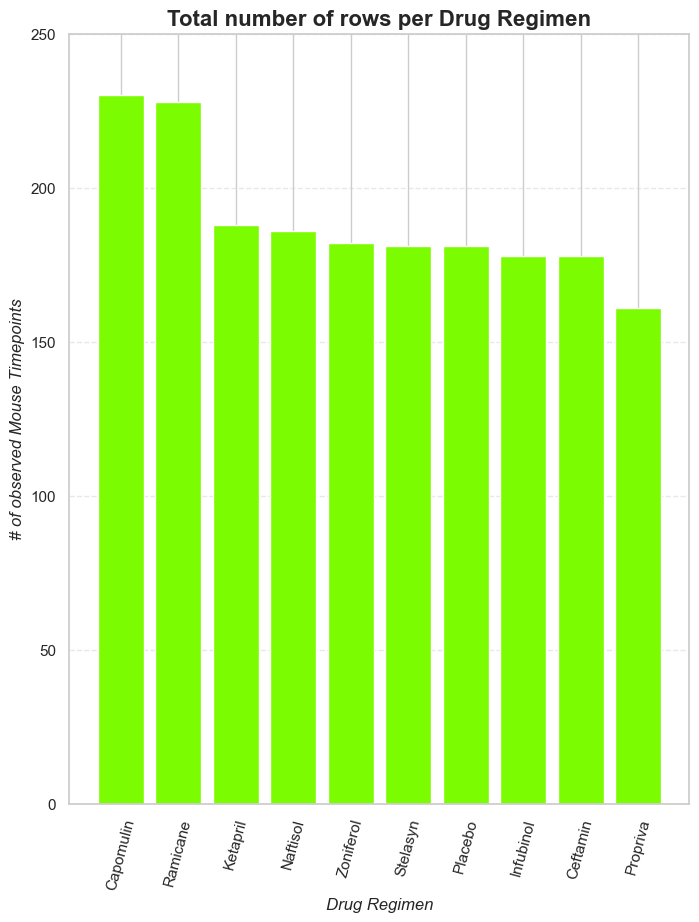

In [142]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


x=plot_data.index
y=plot_data.values

# create canvas
plt.figure(figsize=(8,10))

# skeleton
plt.bar(x, y, color="lawngreen")

# Customization
plt.ylabel("# of observed Mouse Timepoints", fontsize=12, fontstyle="oblique")
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="oblique")
plt.title("Total number of rows per Drug Regimen", fontsize=16, fontweight="bold")
plt.ylim(0, 250)

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)
plt.xticks(rotation=75)

# show
plt.show()

In [143]:
pie_data=final_data['Sex'].value_counts()
pie_data

Sex
Male      958
Female    935
Name: count, dtype: int64

Text(0, 0.5, 'Sex')

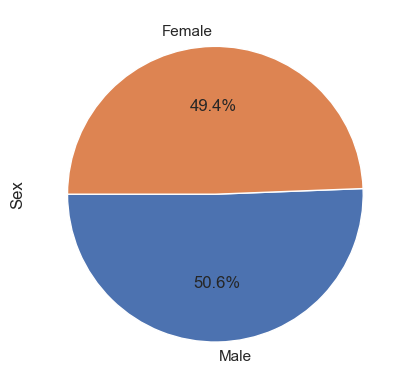

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data.plot(kind='pie',autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')

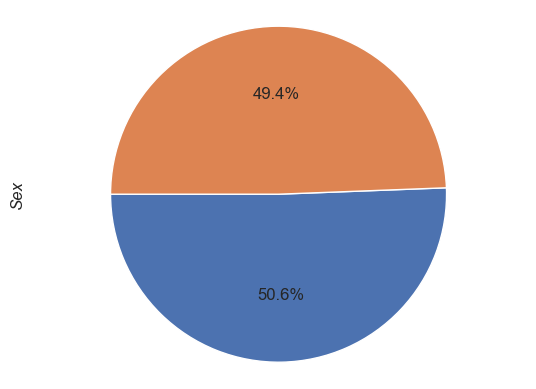

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x=pie_data.index
y=pie_data.values


plt.pie(pie_data,autopct="%1.1f%%", startangle=180)

plt.axis("equal")

plt.ylabel("Sex", fontsize=12, fontstyle="oblique")


# show
plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume=clean_data.groupby(["Mouse ID","Timepoint"]).max()
final_volume=clean_data.reset_index()

merge_data= pd.merge(clean_data,final_volume[['Mouse ID', 'Timepoint']], on=['Mouse ID', 'Timepoint'], how='inner')
# we filtered the data to only get the results from the tratements we need
data_filtered=merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])

# then clean the data and eliminate the false values
data_frame=merge_data.loc[data_filtered].reset_index(drop=True)
data_frame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,c326,0,45.000000,0,Infubinol,Female,18,25
2,c139,0,45.000000,0,Infubinol,Male,11,28
3,v339,0,45.000000,0,Infubinol,Male,20,26
4,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17
810,i177,45,33.562402,3,Ramicane,Male,10,18
811,r944,45,41.581521,2,Capomulin,Male,12,25
812,u364,45,31.023923,3,Capomulin,Male,18,17


Text(0, 0.5, 'Final Tumor Volume (mm3)')

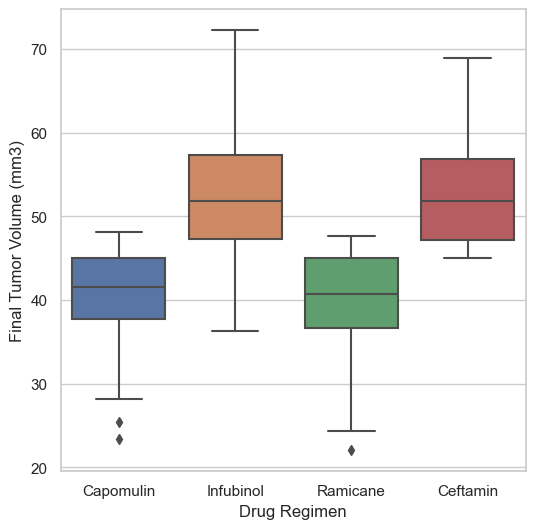

In [147]:

plt.figure(figsize=(6, 6))
sns.boxplot(data=data_frame,x="Drug Regimen",y="Tumor Volume (mm3)") 
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [148]:
line_data= data_frame[data_frame['Drug Regimen'] == 'Capomulin']
line_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
76,j246,0,45.000000,0,Capomulin,Female,21,21
77,r554,0,45.000000,0,Capomulin,Female,8,17
78,s185,0,45.000000,0,Capomulin,Female,3,17
79,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
796,s710,45,40.728578,1,Capomulin,Female,1,23
801,j119,45,38.125164,1,Capomulin,Female,7,23
808,i557,45,47.685963,1,Capomulin,Female,1,24
811,r944,45,41.581521,2,Capomulin,Male,12,25


In [149]:
mouse_info=line_data[line_data['Mouse ID'] == 'b128']
mouse_info


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
186,b128,5,45.651331,0,Capomulin,Female,9,22
275,b128,10,43.270852,0,Capomulin,Female,9,22
293,b128,15,43.784893,0,Capomulin,Female,9,22
381,b128,20,42.731552,0,Capomulin,Female,9,22
522,b128,25,43.262145,1,Capomulin,Female,9,22
581,b128,30,40.605335,1,Capomulin,Female,9,22
654,b128,35,37.967644,1,Capomulin,Female,9,22
692,b128,40,38.379726,2,Capomulin,Female,9,22
752,b128,45,38.982878,2,Capomulin,Female,9,22


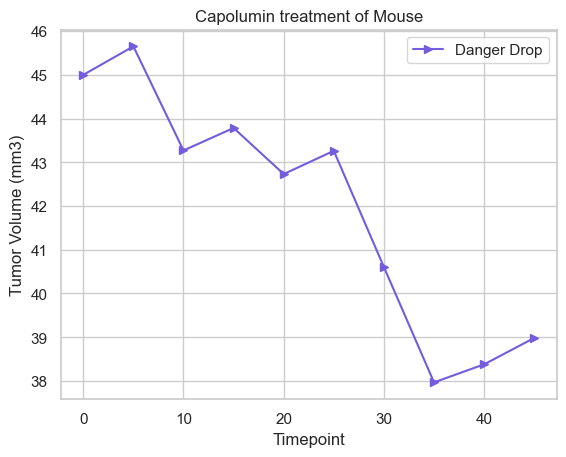

In [150]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_info.plot( "Timepoint","Tumor Volume (mm3)", color="#735CDD", label="Danger Drop",marker=">")
plt.title("Capolumin treatment of Mouse")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#I asked the xpert

avg_tumor= line_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
avg_tumor


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344
5,i557,24.0,44.805810
6,i738,20.0,39.141053
7,j119,23.0,44.465236
8,j246,21.0,43.216925
9,l509,21.0,44.434474


Text(0, 0.5, 'Average Tumor Volume (mm3)')

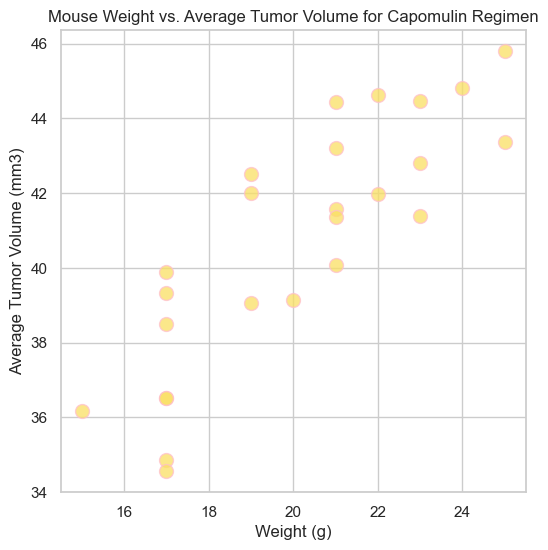

In [152]:
# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 6))
plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'], color='#FADF63', alpha=0.75,edgecolor="pink",s=100)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [158]:
#correlation

correlation= avg_tumor.corr(numeric_only = True)
correlation
0.841936 **2


0.708856228096

C:\Users\gabri\AppData\Local\Temp\ipykernel_15984\2565652595.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-",color="#D8CC34")


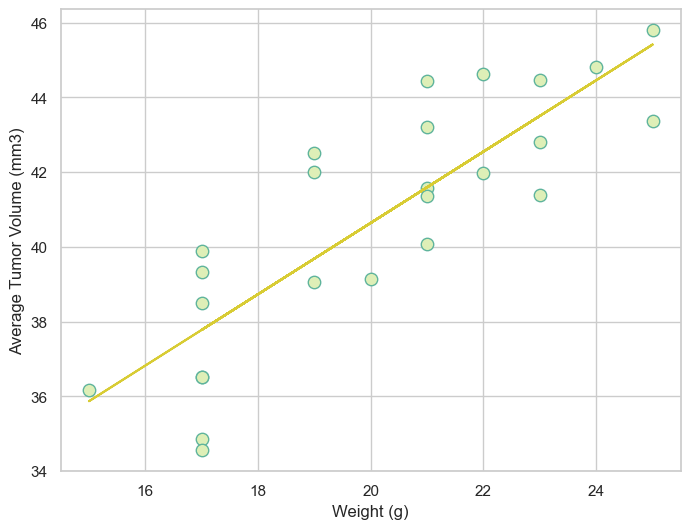

In [175]:
regress_values = x_values * slope + intercept
x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']


slope, intercept, r_value, p_value, std_err = stats.linregress(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(8,6))

plt.scatter(x_values,y_values,facecolor="#DEEFB7",s=80,edgecolor="#5FB49C")
plt.plot(x_values,regress_values,"r-",color="#D8CC34")




plt.annotate(line_eq,(0,50),)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



plt.show()